<a href="https://colab.research.google.com/github/chimera-org/chimera_v2.0/blob/main/notebooks/eegencoder_experiments/01_load_bcic4_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone your GitHub repository
!git clone https://github.com/chimera-org/chimera_v2.0/

print("✅ Repository cloned.")

Cloning into 'chimera_v2.0'...
remote: Enumerating objects: 1671, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 1671 (delta 163), reused 105 (delta 105), pack-reused 1455 (from 2)
Receiving objects: 100% (1671/1671), 961.90 KiB | 7.23 MiB/s, done.
Resolving deltas: 100% (849/849), done.
✅ Repository cloned.


In [2]:
print("Contents of /content/chimera_v2.0/")
!ls -F /content/chimera_v2.0/

print("\nContents of /content/chimera_v2.0/src/")
!ls -F /content/chimera_v2.0/src/

Contents of /content/chimera_v2.0/
architecture/	    data/	      Makefile	      regulatory/	src/
benchmarks/	    deployment/       models/	      requirements.txt	tests/
clinical/	    docs/	      notebooks/      research/
CODE_OF_CONDUCT.md  GOVERNANCE.md     pyproject.toml  scripts/
config/		    ISSUE_TRACKER.md  quality/	      security/
CONTRIBUTING.md     LICENSE	      README.md       SECURITY.md

Contents of /content/chimera_v2.0/src/
chimera/  eegencoder/


In [3]:
# Setup and Imports
"""
BCI Competition IV 2a - Data Loading Verification
Purpose: Verify dataset integrity before training EEGEncoder
"""

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install minimal dependencies (Colab already has most)
!pip install mne numpy scipy matplotlib tqdm --quiet

# Add src to path
import sys
sys.path.append('/content/chimera_v2.0/src/') # Updated path to cloned repo

import numpy as np
import matplotlib.pyplot as plt
from eegencoder.data_loader import BCIC4_2A_Loader, verify_dataset

print("✅ Environment ready")

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 37.9 MB/s eta 0:00:00
✅ Environment ready


In [4]:
# Creating target directory where GDF files are expected to be
import os

extraction_path = "/content/drive/MyDrive/BCI_IV_2a/"
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)
    print(f"Created directory: {extraction_path}")
else:
    print(f"Directory already exists: {extraction_path}")

Directory already exists: /content/drive/MyDrive/BCI_IV_2a/


In [5]:
# Extracting zip files into the target directory
zip_file_path = "/content/drive/MyDrive/Motor_Imagery_Datasets/OpenBCI/BCI_cIV_2a/BCICIV_2a_gdf.zip"
extraction_path = "/content/drive/MyDrive/BCI_IV_2a/"

# Unzip the file
!unzip -o "{zip_file_path}" -d "{extraction_path}"

print(f"✅ Dataset extracted to {extraction_path}")

Archive:  /content/drive/MyDrive/Motor_Imagery_Datasets/OpenBCI/BCI_cIV_2a/BCICIV_2a_gdf.zip
  inflating: /content/drive/MyDrive/BCI_IV_2a/A01E.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A01T.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A02E.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A02T.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A03E.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A03T.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A04E.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A04T.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A05E.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A05T.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A06E.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A06T.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A07E.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A07T.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A08E.gdf  
  inflating: /content/drive/MyDrive/BCI_IV_2a/A08T.g

In [6]:
import mne
raw = mne.io.read_raw_gdf("/content/drive/MyDrive/BCI_IV_2a/A01T.gdf", preload=True, verbose=False)

print("All channel names:")
for i, ch in enumerate(raw.ch_names):
    print(f"{i:02d}: {ch}")

print(f"\nTotal channels: {len(raw.ch_names)}")
print(f"Channel types: {raw.get_channel_types()}")

All channel names:
00: EEG-Fz
01: EEG-0
02: EEG-1
03: EEG-2
04: EEG-3
05: EEG-4
06: EEG-5
07: EEG-C3
08: EEG-6
09: EEG-Cz
10: EEG-7
11: EEG-C4
12: EEG-8
13: EEG-9
14: EEG-10
15: EEG-11
16: EEG-12
17: EEG-13
18: EEG-14
19: EEG-Pz
20: EEG-15
21: EEG-16
22: EOG-left
23: EOG-central
24: EOG-right

Total channels: 25
Channel types: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']


In [7]:
# Initialize Loader and Verify Subjects
# Create loader instance
loader = BCIC4_2A_Loader(data_path="/content/drive/MyDrive/BCI_IV_2a/")

# Verify first 3 subjects (training data)
print("=== TRAINING DATA VERIFICATION ===")
for subj_id in [1, 2, 3]:
    X, y = verify_dataset(loader, subject_id=subj_id)
    print()


=== TRAINING DATA VERIFICATION ===

🔍 Verifying Subject 01...
✅ SUCCESS: X=(287, 22, 1000), labels=[71 72 72 72]


🔍 Verifying Subject 02...
✅ SUCCESS: X=(287, 22, 1000), labels=[72 72 71 72]


🔍 Verifying Subject 03...
✅ SUCCESS: X=(287, 22, 1000), labels=[72 72 71 72]



In [8]:
# Initialize Loader and Verify Subjects
# Create loader instance
loader = BCIC4_2A_Loader(data_path="/content/drive/MyDrive/BCI_IV_2a/")

# Verify first 3 subjects (training data)
print("=== TRAINING DATA VERIFICATION ===")
for subj_id in [1, 2, 3]:
    X, y = verify_dataset(loader, subject_id=subj_id)
    print()

=== TRAINING DATA VERIFICATION ===

🔍 Verifying Subject 01...
✅ SUCCESS: X=(287, 22, 1000), labels=[71 72 72 72]


🔍 Verifying Subject 02...
✅ SUCCESS: X=(287, 22, 1000), labels=[72 72 71 72]


🔍 Verifying Subject 03...
✅ SUCCESS: X=(287, 22, 1000), labels=[72 72 71 72]



In [9]:
# Label Distribution Check
# Verify all subjects have balanced classes
print("=== LABEL DISTRIBUTION ACROSS ALL SUBJECTS ===")
all_dist = []

for subj_id in range(1, 10):
    X, y = loader.load_subject(subj_id, training=True)
    dist = np.bincount(y, minlength=4)
    all_dist.append(dist)
    print(f"Subject {subj_id:02d}: {dist} (Total: {len(y)})")

all_dist = np.array(all_dist)
print(f"\n📊 Mean ± Std across subjects: {all_dist.mean(axis=0)} ± {all_dist.std(axis=0)}")

# Check balance
if np.allclose(all_dist.mean(axis=0), 72, rtol=0.1):  # Should be ~72 trials per class
    print("✅ Dataset is balanced (good for training)")
else:
    print("⚠️  Dataset imbalance detected")


=== LABEL DISTRIBUTION ACROSS ALL SUBJECTS ===
Subject 01: [71 72 72 72] (Total: 287)
Subject 02: [72 72 71 72] (Total: 287)
Subject 03: [72 72 71 72] (Total: 287)
Subject 04: [71 72 72 72] (Total: 287)
Subject 05: [72 72 71 72] (Total: 287)
Subject 06: [72 72 71 72] (Total: 287)
Subject 07: [72 72 71 72] (Total: 287)
Subject 08: [72 72 71 72] (Total: 287)
Subject 09: [72 72 71 72] (Total: 287)

📊 Mean ± Std across subjects: [71.77777778 72.         71.22222222 72.        ] ± [0.41573971 0.         0.41573971 0.        ]
✅ Dataset is balanced (good for training)


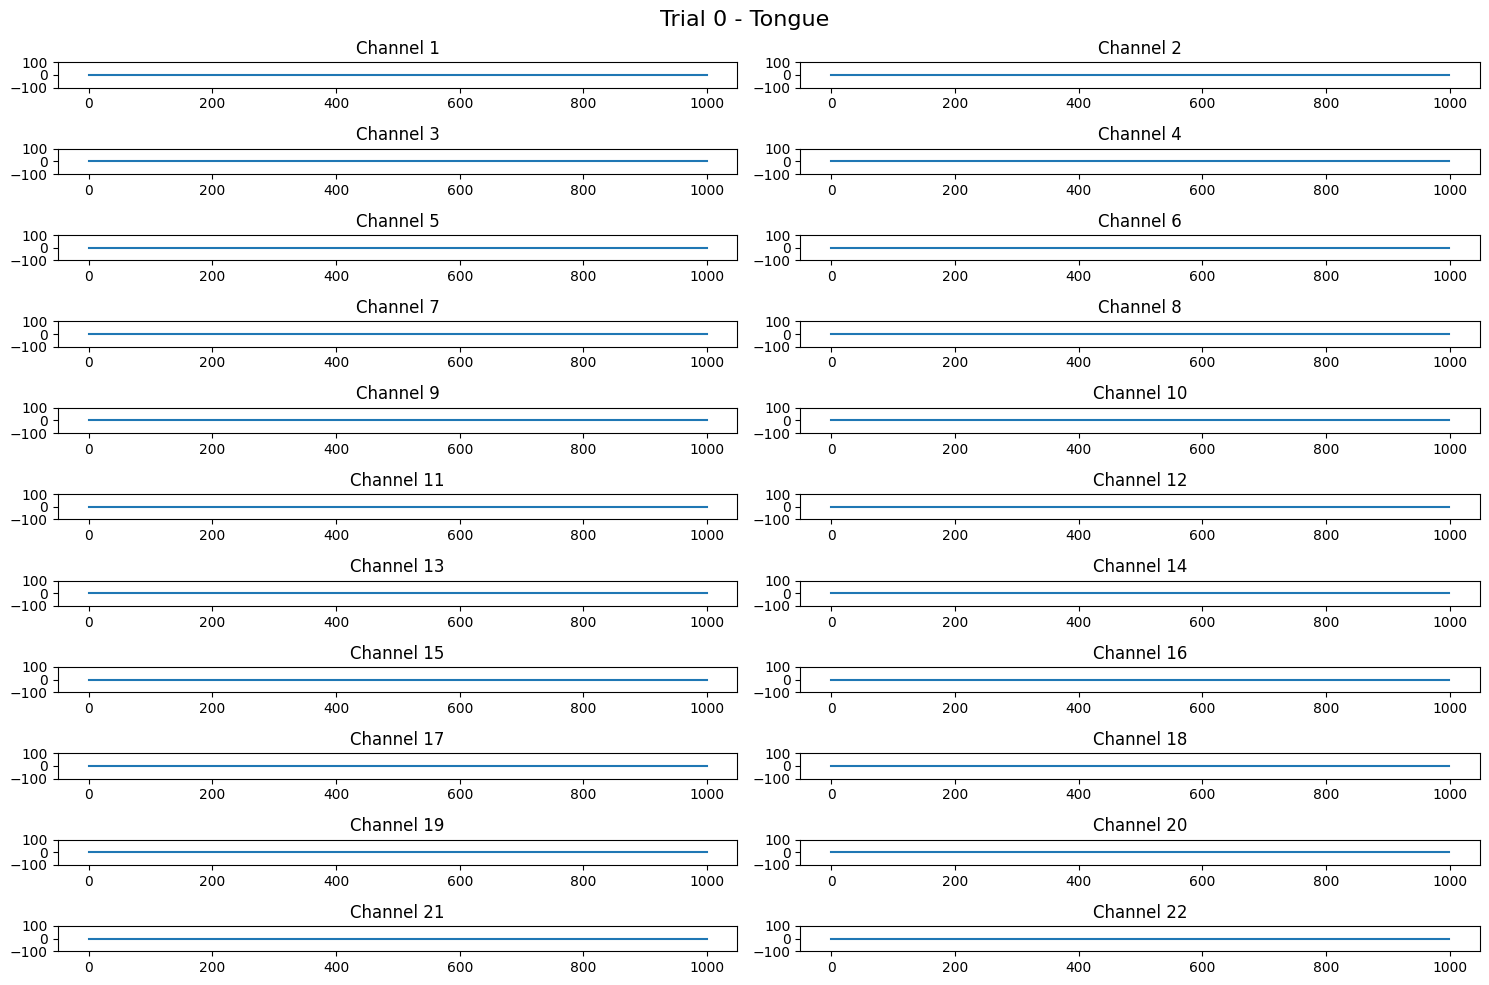

In [10]:
# Visualize One Trial
def plot_trial(X, y, trial_idx=0):
    """Plot a single trial with all 22 channels"""
    fig, axes = plt.subplots(11, 2, figsize=(15, 10))
    axes = axes.flatten()

    trial_data = X[trial_idx]  # Shape: (22, 1000)
    label = y[trial_idx]
    label_names = ['Left Hand', 'Right Hand', 'Foot', 'Tongue']

    for ch in range(22):
        axes[ch].plot(trial_data[ch])
        axes[ch].set_title(f'Channel {ch+1}')
        axes[ch].set_ylim([-100, 100])  # EEG typical range in µV

    fig.suptitle(f'Trial {trial_idx} - {label_names[label]}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot one trial from subject 1
X1, y1 = loader.load_subject(1)
plot_trial(X1, y1, trial_idx=0)

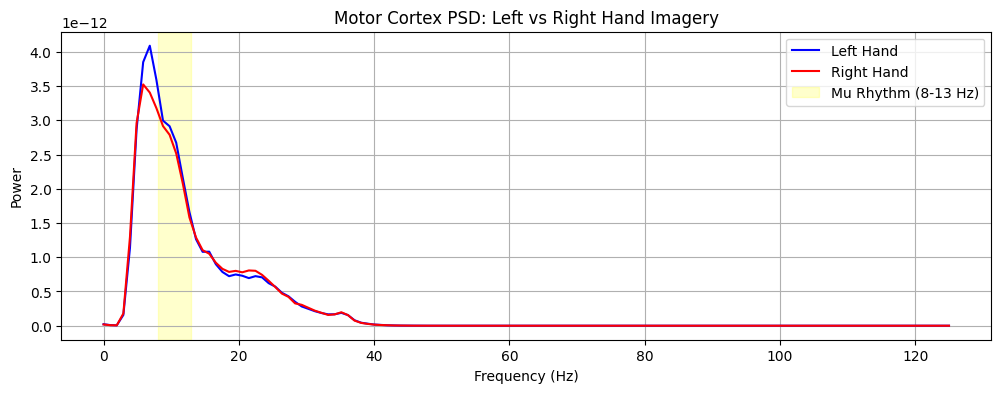

✅ Mu rhythm should show power differences between conditions
   (This is the neural signature EEGEncoder will learn)


In [11]:
# Spectral Analysis Verification
def check_mu_rhythm(X, y):
    """Verify mu rhythm (8-13 Hz) is present in motor cortex channels"""
    from scipy.signal import welch

    # Motor cortex channels: C3 (channel 8), Cz (channel 9), C4 (channel 10)
    motor_channels = [7, 8, 9]  # 0-indexed

    # Separate left vs right hand trials
    left_trials = X[y == 0]  # Left hand is label 0
    right_trials = X[y == 1]  # Right hand is label 1

    # Compute PSD for each condition
    f_left, psd_left = welch(left_trials[:, motor_channels, :],
                             fs=250, axis=-1, nperseg=256)
    f_right, psd_right = welch(right_trials[:, motor_channels, :],
                               fs=250, axis=-1, nperseg=256)

    # Average across trials and channels
    psd_left_mean = psd_left.mean(axis=(0, 1))
    psd_right_mean = psd_right.mean(axis=(0, 1))

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(f_left, psd_left_mean, label='Left Hand', color='blue')
    plt.plot(f_right, psd_right_mean, label='Right Hand', color='red')
    plt.axvspan(8, 13, alpha=0.2, color='yellow', label='Mu Rhythm (8-13 Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Motor Cortex PSD: Left vs Right Hand Imagery')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("✅ Mu rhythm should show power differences between conditions")
    print("   (This is the neural signature EEGEncoder will learn)")

# Check subject 1
check_mu_rhythm(X1, y1)

In [12]:
# Save Preprocessed Data for Training
def save_preprocessed_data(loader, output_dir="/content/drive/MyDrive/chimera_v2.0/data/bcic4_2a_processed/"):
    """Save training subjects as numpy files (faster loading)"""
    import os
    os.makedirs(output_dir, exist_ok=True)

    print("=== SAVING PREPROCESSED TRAINING DATA ===")
    for subj_id in range(1, 10):
        # Load training data (contains MI events and labels)
        X_train, y_train = loader.load_subject(subj_id, training=True)

        # Save as numpy files
        np.save(f"{output_dir}subject_{subj_id:02d}_X.npy", X_train)
        np.save(f"{output_dir}subject_{subj_id:02d}_y.npy", y_train)

        print(f"✅ Subject {subj_id:02d} saved: X={X_train.shape}, labels={np.bincount(y_train)}")

    print(f"\n📁 Data saved to: {output_dir}")
    print(f"📊 {len(os.listdir(output_dir))} .npy files created")

# Run this once to create training-ready files
save_preprocessed_data(loader)

=== SAVING PREPROCESSED TRAINING DATA ===
✅ Subject 01 saved: X=(287, 22, 1000), labels=[71 72 72 72]
✅ Subject 02 saved: X=(287, 22, 1000), labels=[72 72 71 72]
✅ Subject 03 saved: X=(287, 22, 1000), labels=[72 72 71 72]
✅ Subject 04 saved: X=(287, 22, 1000), labels=[71 72 72 72]
✅ Subject 05 saved: X=(287, 22, 1000), labels=[72 72 71 72]
✅ Subject 06 saved: X=(287, 22, 1000), labels=[72 72 71 72]
✅ Subject 07 saved: X=(287, 22, 1000), labels=[72 72 71 72]
✅ Subject 08 saved: X=(287, 22, 1000), labels=[72 72 71 72]
✅ Subject 09 saved: X=(287, 22, 1000), labels=[72 72 71 72]

📁 Data saved to: /content/drive/MyDrive/chimera_v2.0/data/bcic4_2a_processed/
📊 20 .npy files created


In [13]:
# Cross-Subject Split Verification
def create_cross_subject_splits(loader, test_subject=9):
    """
    Create LOSO (Leave-One-Subject-Out) split
    EEGEncoder uses this for cross-subject evaluation
    """
    train_subjects = [i for i in range(1, 10) if i != test_subject]

    X_train, y_train, groups_train = loader.load_all_subjects(train_subjects, training=True)
    X_test, y_test, groups_test = loader.load_all_subjects([test_subject], training=True)

    print(f"=== LOSO SPLIT (Test Subject: {test_subject:02d}) ===")
    print(f"Train: {X_train.shape[0]} trials from subjects {train_subjects}")
    print(f"Test:  {X_test.shape[0]} trials from subject {test_subject}")
    print(f"✅ Ready for EEGEncoder cross-subject training")

    return (X_train, y_train), (X_test, y_test)

# Verify split works
train_set, test_set = create_cross_subject_splits(loader, test_subject=1)


=== LOSO SPLIT (Test Subject: 01) ===
Train: 2296 trials from subjects [2, 3, 4, 5, 6, 7, 8, 9]
Test:  287 trials from subject 1
✅ Ready for EEGEncoder cross-subject training
